**LOAD REQUIRED LIBRARIES**

In [ ]:
#LOADING REQUIRED LIBRARIES
#Data Visualization libraries
import pandas as pd
import seaborn as sns
import numpy as np
#Machine learning classification model libraries
from xgboost import XGBClassifier
from matplotlib import pyplot as plt
%matplotlib inline
#Encoders
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
#Scalers
from sklearn.preprocessing import StandardScaler
#Importing train, test split library
from sklearn.model_selection import train_test_split
# Libraries to test model on different thresholds
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
#Import warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
#load dataset
data = pd.read_csv('train.csv')

In [ ]:
data.head()

animal_id_outcome  dob_year  ...  outcome_number     outcome_type
0           A006100      2007  ...             1.0  Return to Owner
1           A006100      2007  ...             2.0  Return to Owner
2           A006100      2007  ...             3.0  Return to Owner
3           A047759      2004  ...             1.0          Missing
4           A134067      1997  ...             1.0  Return to Owner

[5 rows x 37 columns]

In [ ]:
test = pd.read_csv('test.csv')

In [ ]:
#summary of dataset
data.describe()

dob_year     dob_month  ...  outcome_hour  outcome_number
count  47803.000000  47803.000000  ...  47803.000000    47803.000000
mean    2012.197728      6.337531  ...     14.381545        1.144552
std        3.068255      3.342038  ...      3.456145        0.500055
min     1992.000000      1.000000  ...      0.000000        1.000000
25%     2011.000000      4.000000  ...     12.000000        1.000000
50%     2013.000000      6.000000  ...     15.000000        1.000000
75%     2014.000000      9.000000  ...     17.000000        1.000000
max     2016.000000     12.000000  ...     23.000000       13.000000

[8 rows x 16 columns]

In [ ]:
#check whether the dataset is balanced or imbalanced 
data.outcome_type.value_counts(normalize=True)

Adoption           0.271259
Transfer           0.216409
Return to Owner    0.203293
Euthanasia         0.086689
Died               0.059180
Missing            0.054369
Relocate           0.053825
Rto-Adopt          0.051252
Disposal           0.003724
Name: outcome_type, dtype: float64

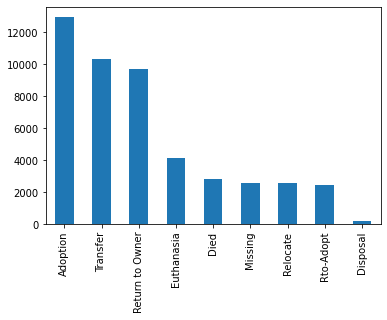

In [ ]:
#Drawing a count plot of dependent variable to check the biasness of prediction in data present
data['outcome_type'].value_counts().plot.bar()

**CHECK MISSING VALUES**

In [ ]:
#check for the null values 
data.isna().sum()

animal_id_outcome                0
dob_year                         0
dob_month                        0
age_upon_intake                  0
animal_type                      0
breed                            0
color                            0
intake_condition                 0
intake_type                      0
sex_upon_intake                  1
count                            0
age_upon_intake_(days)           0
age_upon_intake_(years)          0
age_upon_intake_age_group        0
intake_datetime                  0
intake_month                     0
intake_year                      0
intake_monthyear                 0
intake_weekday                   0
intake_hour                      0
intake_number                    0
time_in_shelter                  0
time_in_shelter_days             0
age_upon_outcome                 0
date_of_birth                    0
sex_upon_outcome                 1
age_upon_outcome_(days)          0
age_upon_outcome_(years)         0
age_upon_outcome_age

In [ ]:
test.isna().sum()

animal_id_outcome             0
dob_year                      0
dob_month                     0
age_upon_intake               0
animal_type                   0
breed                         0
color                         0
intake_condition              0
intake_type                   0
sex_upon_intake               0
count                         0
age_upon_intake_(days)        0
age_upon_intake_(years)       0
age_upon_intake_age_group     0
intake_datetime               0
intake_month                  0
intake_year                   0
intake_monthyear              0
intake_weekday                0
intake_hour                   0
intake_number                 0
time_in_shelter               0
time_in_shelter_days          0
age_upon_outcome              0
date_of_birth                 0
sex_upon_outcome              0
age_upon_outcome_(days)       0
age_upon_outcome_(years)      0
age_upon_outcome_age_group    0
outcome_datetime              0
outcome_month                 0
outcome_

**DATA VISUALIZATION**

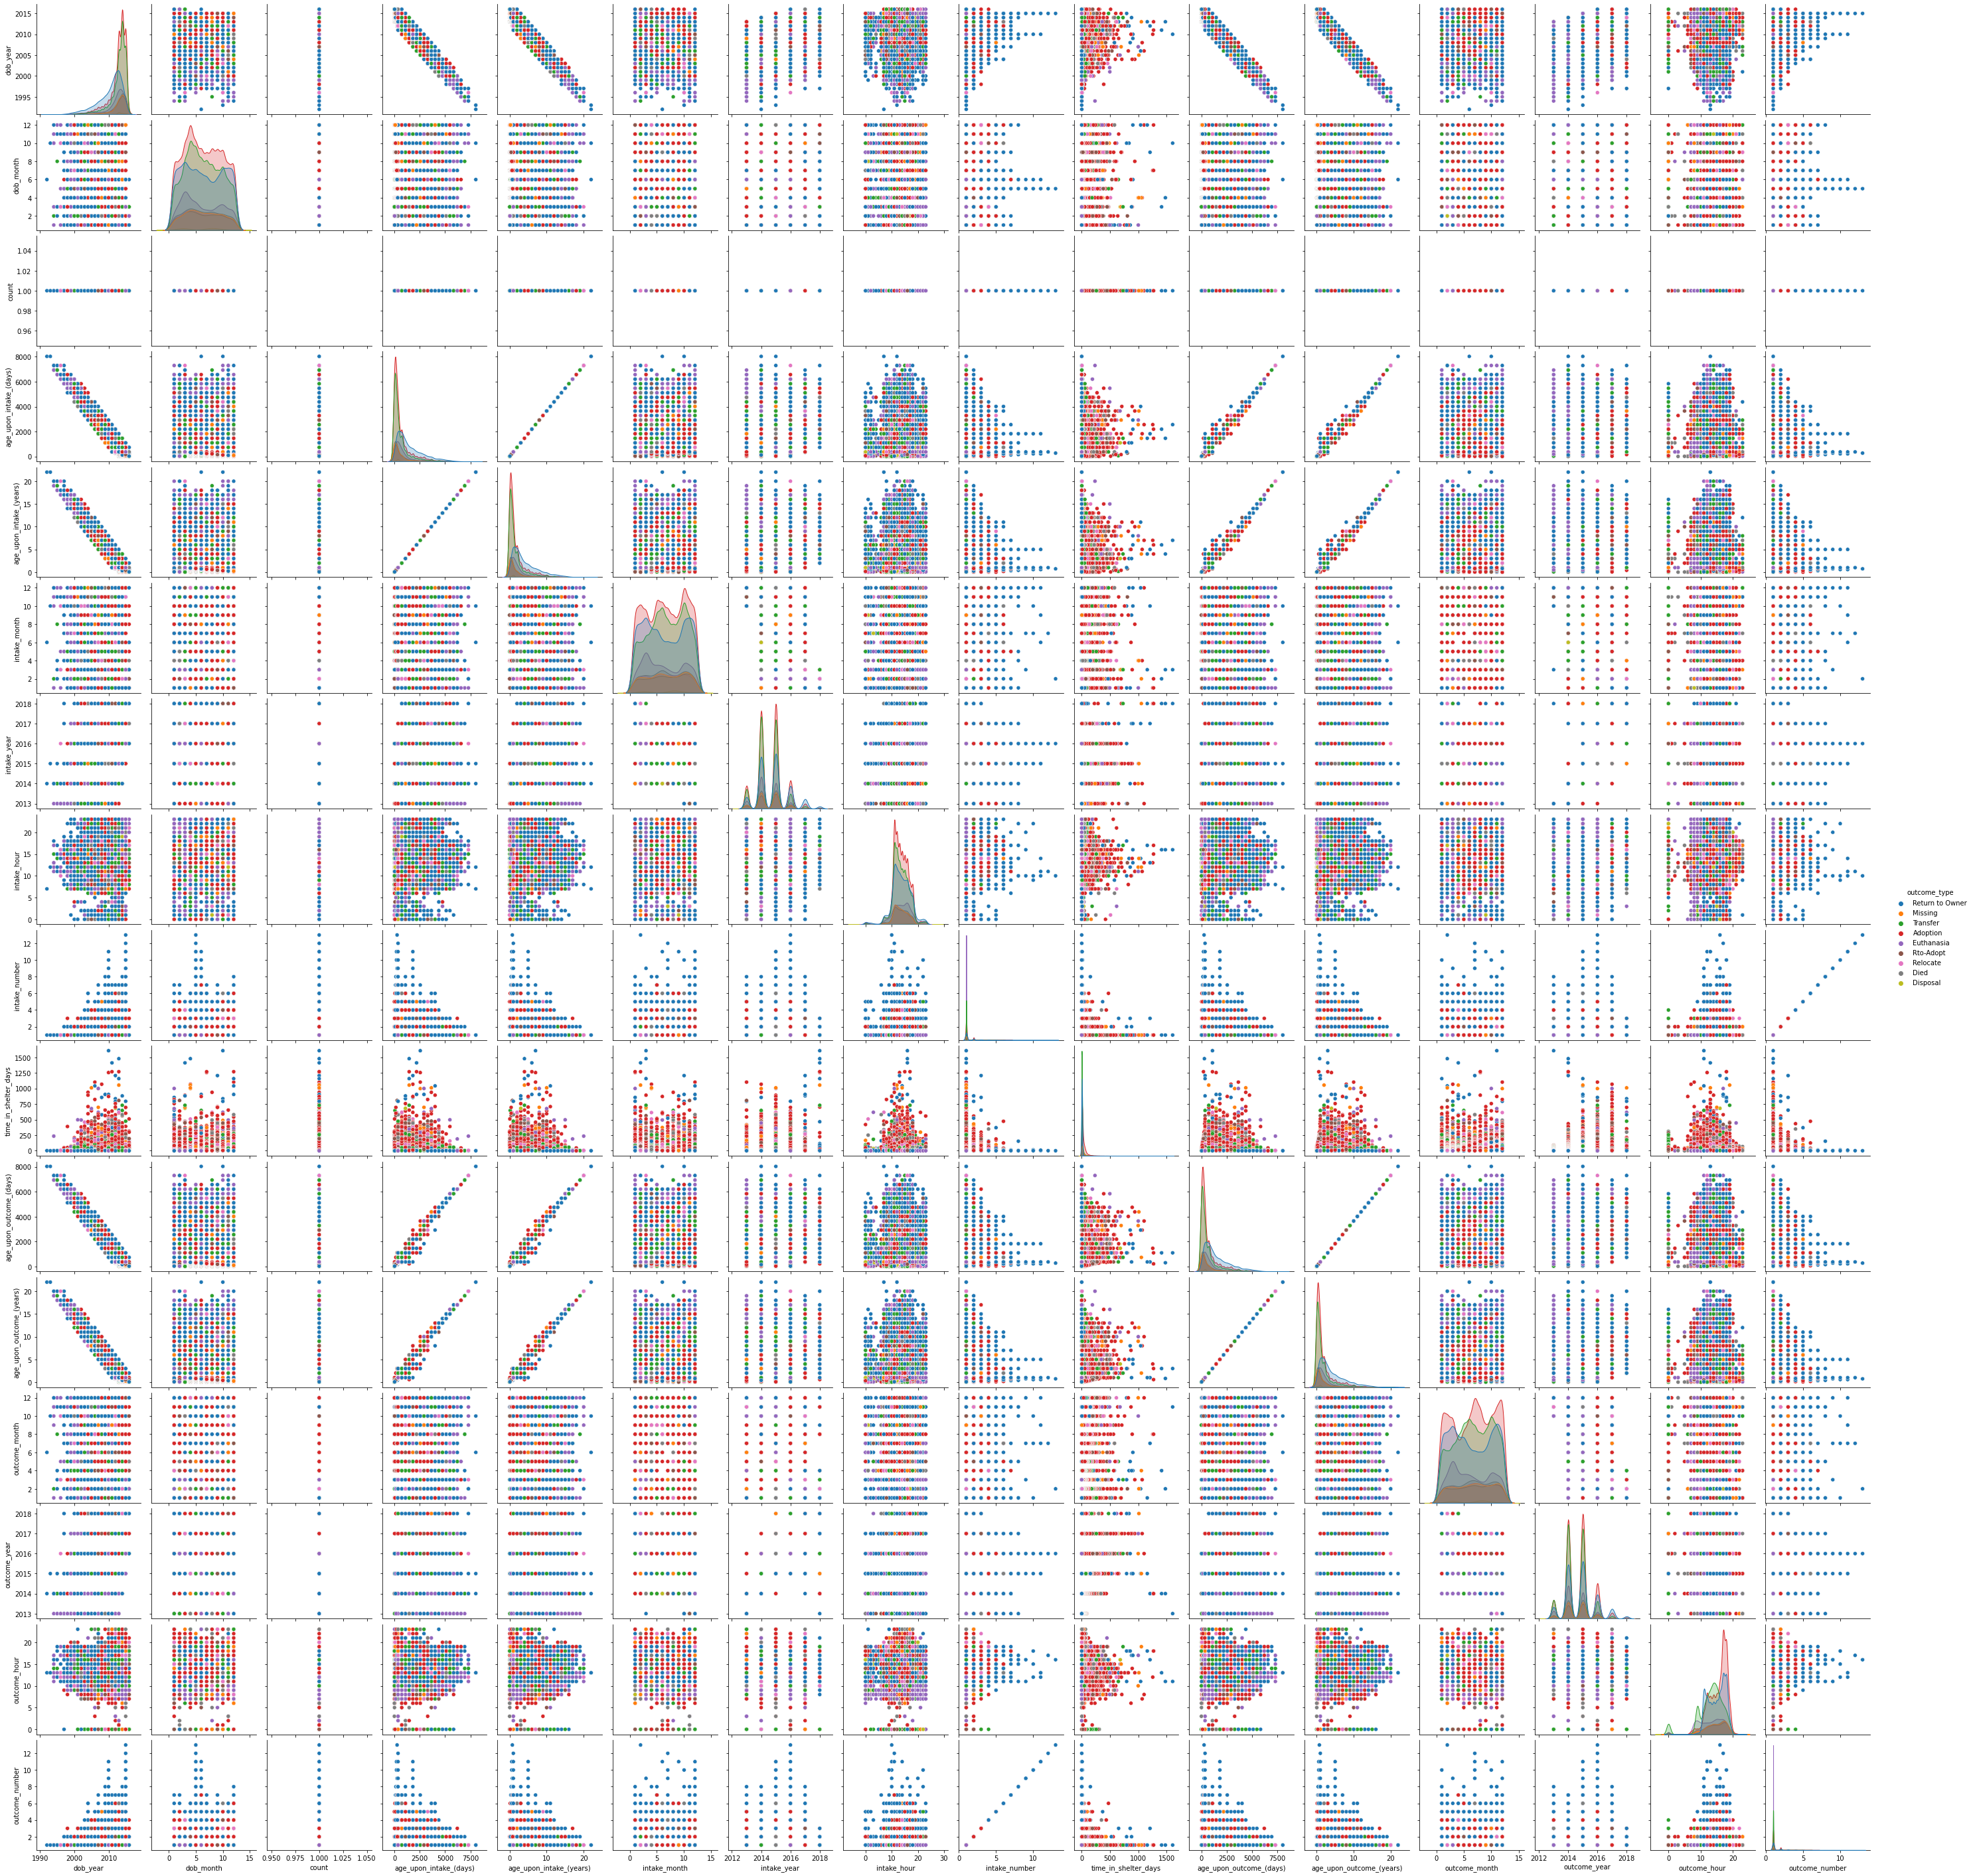

In [ ]:
sns.pairplot(data,hue='outcome_type',height=2.5)

**CORRELATION GRAPHS**

dob_year  dob_month  ...  outcome_hour  outcome_number
dob_year                  1.000000  -0.103832  ...      0.011364       -0.034350
dob_month                -0.103832   1.000000  ...      0.008905        0.007294
count                          NaN        NaN  ...           NaN             NaN
age_upon_intake_(days)   -0.958837   0.008608  ...     -0.031550        0.035179
age_upon_intake_(years)  -0.958837   0.008608  ...     -0.031550        0.035179
intake_month             -0.026966   0.497811  ...     -0.006536       -0.007208
intake_year               0.102606  -0.173286  ...     -0.064364        0.034904
intake_hour               0.008906   0.009353  ...      0.045638       -0.002818
intake_number            -0.034350   0.007294  ...      0.069982        1.000000
time_in_shelter_days     -0.030672  -0.004710  ...     -0.039735        0.005780
age_upon_outcome_(days)  -0.958874   0.008469  ...     -0.032536        0.034455
age_upon_outcome_(years) -0.958874   0.008469  ...     -0.032536        0.034455
outcome_month            -0.003990   0.385436  ...     -0.009821       -0.016320
outcome_year              0.091078  -0.139233  ...     -0.068969        0.035076
outcome_hour              0.011364   0.008905  ...      1.000000        0.069982
outcome_number           -0.034350   0.007294  ...      0.069982        1.000000

[16 rows x 16 columns]

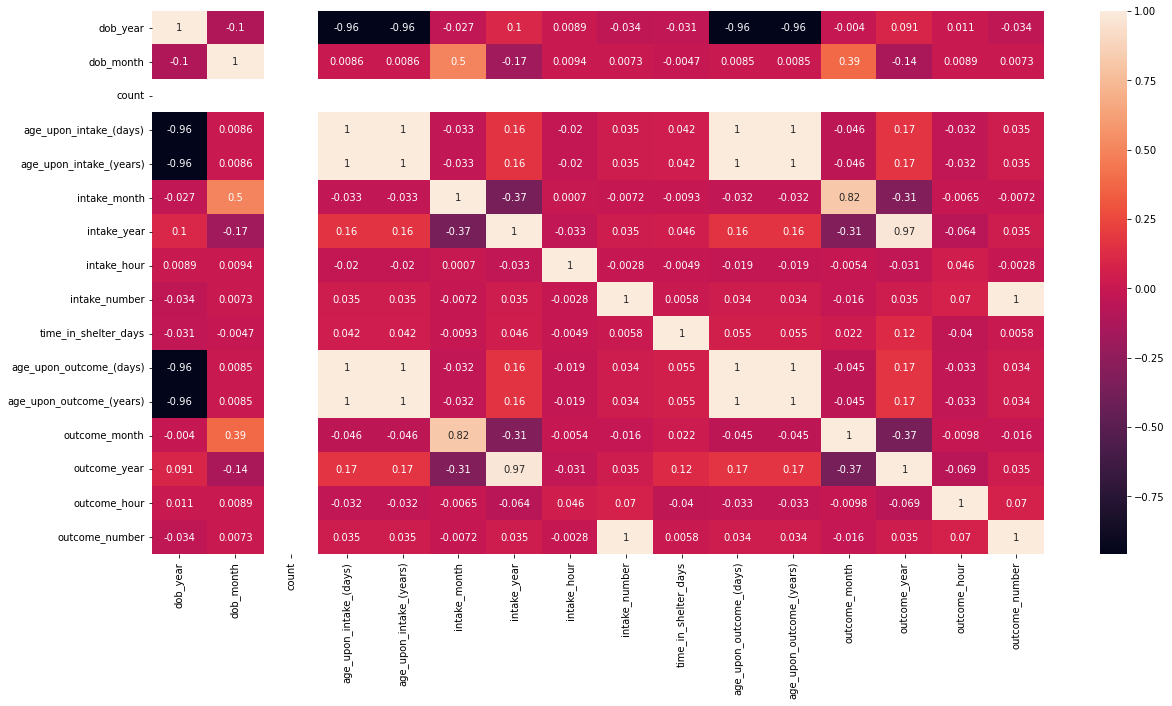

In [ ]:
#CHOSE RIGHT FEATURE SELECTION METHOD BASED ON THE INPUT/OUTPUT VARIABLES 
#CORRELATION COEFF FOR FEATURE SELECTION
#pearson for linear data
plt.subplots(figsize=(20,10))
sns.heatmap(data.corr(method='pearson'),annot=True)
data.corr(method='pearson')

dob_year  dob_month  ...  outcome_hour  outcome_number
dob_year                  1.000000  -0.152877  ...      0.034421       -0.080584
dob_month                -0.152877   1.000000  ...      0.008072        0.004732
count                          NaN        NaN  ...           NaN             NaN
age_upon_intake_(days)   -0.861463   0.007090  ...     -0.051585        0.108222
age_upon_intake_(years)  -0.861463   0.007090  ...     -0.051585        0.108222
intake_month             -0.040655   0.502337  ...     -0.012034       -0.007060
intake_year               0.266980  -0.169307  ...     -0.031158        0.029418
intake_hour              -0.006227   0.007596  ...      0.067763       -0.005057
intake_number            -0.080584   0.004732  ...      0.083052        1.000000
time_in_shelter_days      0.003688   0.005219  ...      0.044968        0.040322
age_upon_outcome_(days)  -0.858435   0.005444  ...     -0.055556        0.108535
age_upon_outcome_(years) -0.858435   0.005444  ...     -0.055556        0.108535
outcome_month            -0.010033   0.394764  ...     -0.017049       -0.016486
outcome_year              0.252684  -0.136622  ...     -0.034039        0.032562
outcome_hour              0.034421   0.008072  ...      1.000000        0.083052
outcome_number           -0.080584   0.004732  ...      0.083052        1.000000

[16 rows x 16 columns]

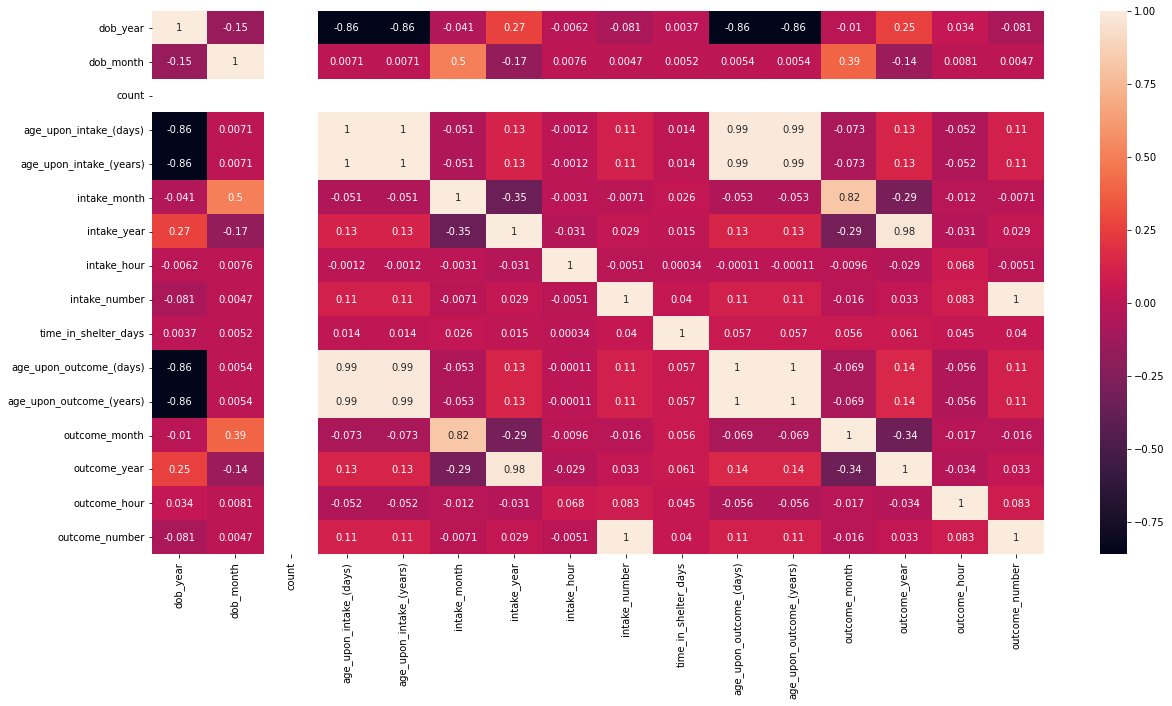

In [ ]:
#spearman for monotonic relation 
plt.subplots(figsize=(20,10))
sns.heatmap(data.corr(method='spearman'),annot=True)
data.corr(method='spearman')

dob_year  dob_month  ...  outcome_hour  outcome_number
dob_year                  1.000000  -0.115744  ...      0.026116       -0.069699
dob_month                -0.115744   1.000000  ...      0.005889        0.003969
count                          NaN        NaN  ...           NaN             NaN
age_upon_intake_(days)   -0.751313   0.004602  ...     -0.037051        0.090511
age_upon_intake_(years)  -0.751313   0.004602  ...     -0.037051        0.090511
intake_month             -0.030557   0.433003  ...     -0.008656       -0.005924
intake_year               0.228987  -0.136541  ...     -0.024842        0.027113
intake_hour              -0.004646   0.005501  ...      0.051728       -0.004298
intake_number            -0.069699   0.003969  ...      0.070351        1.000000
time_in_shelter_days      0.002565   0.003650  ...      0.033164        0.032500
age_upon_outcome_(days)  -0.748507   0.003190  ...     -0.039804        0.090943
age_upon_outcome_(years) -0.748507   0.003190  ...     -0.039804        0.090943
outcome_month            -0.007754   0.337984  ...     -0.012337       -0.013854
outcome_year              0.216535  -0.110411  ...     -0.027067        0.029987
outcome_hour              0.026116   0.005889  ...      1.000000        0.070351
outcome_number           -0.069699   0.003969  ...      0.070351        1.000000

[16 rows x 16 columns]

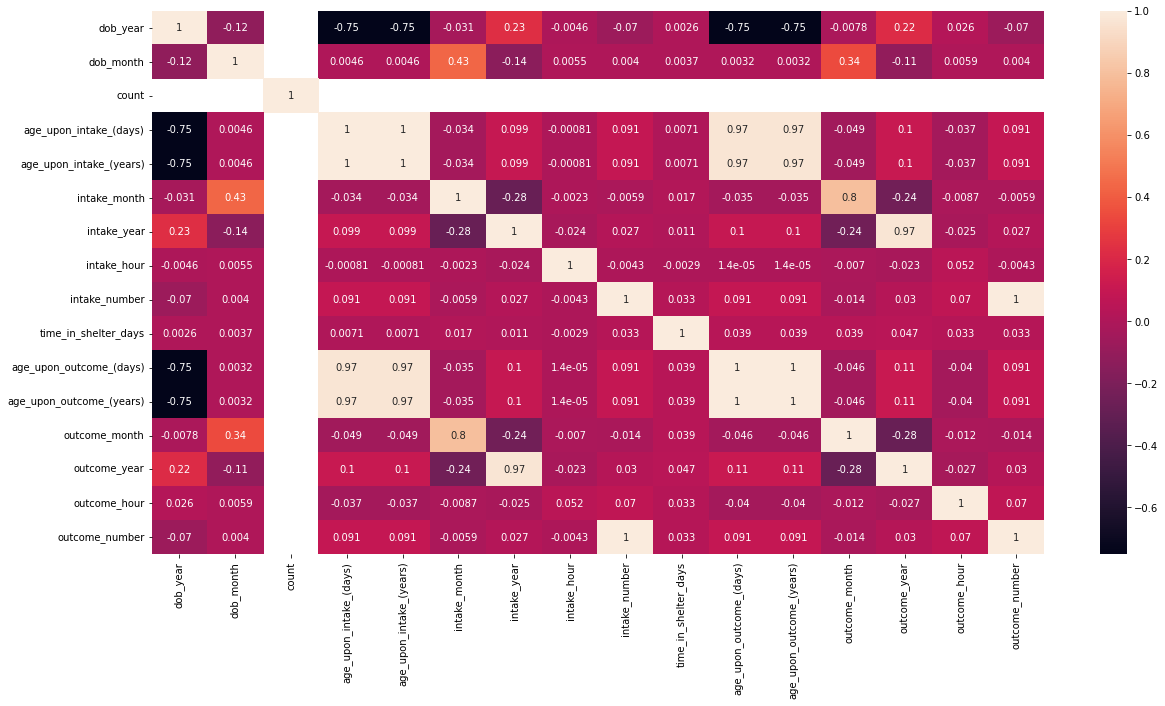

In [ ]:
#for non-linear data
plt.subplots(figsize=(20,10))
sns.heatmap(data.corr(method='kendall'),annot=True)
data.corr(method='kendall')

**DATA CLEANING & EXPLORATORY DATA ANALYSIS**

In [ ]:
qck_check= pd.DataFrame(data.groupby(['intake_number', 'outcome_number']).size())
display(qck_check)

0
intake_number outcome_number       
1.0           1.0             42691
2.0           2.0              3956
3.0           3.0               789
4.0           4.0               226
5.0           5.0                80
6.0           6.0                32
7.0           7.0                12
8.0           8.0                 6
9.0           9.0                 3
10.0          10.0                3
11.0          11.0                3
12.0          12.0                1
13.0          13.0                1

In [ ]:
#CHECK THE SHAPE OF DATASET
data = data.drop(['count', 'outcome_number','outcome_datetime'], axis = 1)
data.shape

(47803, 34)

In [ ]:
test = test.drop(['count', 'outcome_number','outcome_datetime'], axis = 1)
test.shape

(31869, 33)

In [ ]:
#DESCRIBE CATEGORICAL DATASET
data.describe(include = ['O'])

animal_id_outcome age_upon_intake  ... outcome_weekday outcome_type
count              47803           47803  ...           47803        47803
unique             42679              45  ...               7            9
top              A721033          1 year  ...        Saturday     Adoption
freq                  13            8014  ...            7628        12967

[4 rows x 20 columns]

In [ ]:
data[data['animal_id_outcome']=='A721033']

animal_id_outcome  dob_year  ...  outcome_hour     outcome_type
46278           A721033      2015  ...            16  Return to Owner
46279           A721033      2015  ...            18  Return to Owner
46280           A721033      2015  ...            13  Return to Owner
46281           A721033      2015  ...            17  Return to Owner
46282           A721033      2015  ...            16  Return to Owner
46283           A721033      2015  ...            15  Return to Owner
46284           A721033      2015  ...            13  Return to Owner
46285           A721033      2015  ...            12  Return to Owner
46286           A721033      2015  ...            17  Return to Owner
46287           A721033      2015  ...            11  Return to Owner
46288           A721033      2015  ...            15  Return to Owner
46289           A721033      2015  ...            16  Return to Owner
46290           A721033      2015  ...            11  Return to Owner

[13 rows x 34 columns]

In [ ]:
data = data.drop(['animal_id_outcome'], axis = 1)

In [ ]:
#DROP IRRELEVANT/DUPLICATE COLUMNS
data = data.drop(['age_upon_intake', 'age_upon_intake_(years)', 'age_upon_intake_age_group', 'age_upon_outcome', 'age_upon_outcome_(years)', 'age_upon_outcome_age_group', 'date_of_birth','dob_month', 'time_in_shelter'], axis = 1)

In [ ]:
test = test.drop(['age_upon_intake', 'age_upon_intake_(years)', 'age_upon_intake_age_group', 'age_upon_outcome', 'age_upon_outcome_(years)', 'age_upon_outcome_age_group', 'date_of_birth','dob_month', 'time_in_shelter'], axis = 1)

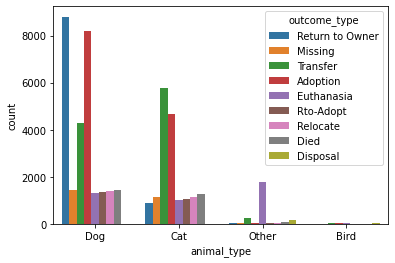

In [ ]:
#animal_type vs outcome_type
sns.countplot(x="animal_type", hue="outcome_type", data= data)

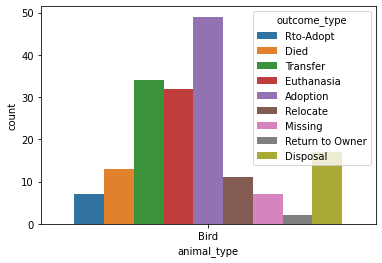

In [ ]:
data_Bird = data[data['animal_type']=='Bird']
sns.countplot(x= 'animal_type', hue="outcome_type", data= data_Bird)

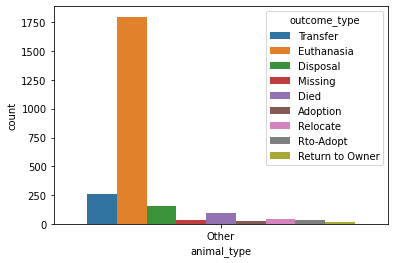

In [ ]:
data_Other= data[data['animal_type']=='Other']
sns.countplot(x= 'animal_type', hue="outcome_type", data= data_Other)

In [ ]:
#Checking animal_type with outcome_type
data.groupby(["breed", 'outcome_type']).size().head(20)

breed                                 outcome_type   
Abyssinian Mix                        Adoption           2
                                      Died               1
                                      Relocate           1
Affenpinscher Mix                     Adoption           2
                                      Died               1
                                      Missing            1
                                      Return to Owner    2
Afghan Hound Mix                      Return to Owner    1
Airedale Terrier                      Transfer           1
Airedale Terrier Mix                  Adoption           1
                                      Missing            1
                                      Return to Owner    4
                                      Transfer           1
Airedale Terrier/Irish Terrier        Relocate           1
Airedale Terrier/Labrador Retriever   Missing            1
                                      Transfer           1
Ai

In [ ]:
#Checking intake-condition 
data.groupby(['intake_type','outcome_type']).size()

intake_type         outcome_type   
Euthanasia Request  Adoption             12
                    Died                  7
                    Euthanasia          189
                    Missing               3
                    Relocate              1
                    Return to Owner       5
                    Rto-Adopt             1
                    Transfer             17
Owner Surrender     Adoption           3460
                    Died                644
                    Disposal              2
                    Euthanasia          506
                    Missing             649
                    Relocate            610
                    Return to Owner     562
                    Rto-Adopt           588
                    Transfer           2089
Public Assist       Adoption            274
                    Died                 58
                    Disposal             20
                    Euthanasia          193
                    Missing             

In [ ]:
data.groupby(['sex_upon_intake','sex_upon_outcome', 'outcome_type']).size()

sex_upon_intake  sex_upon_outcome  outcome_type   
Intact Female    Intact Female     Adoption            235
                                   Died                361
                                   Disposal              1
                                   Euthanasia          616
                                   Missing             324
                                                      ... 
Unknown          Unknown           Missing             124
                                   Relocate            117
                                   Return to Owner      29
                                   Rto-Adopt           118
                                   Transfer           1122
Length: 61, dtype: int64

In [ ]:
#feature modification
data['intake_day'] = pd.DatetimeIndex(data['intake_datetime']).day
data = data.drop(['intake_datetime'], axis = 1)
data['intake_monthyear'] = data['intake_year'] * 100 + data['intake_month']
data['outcome_monthyear'] = data['outcome_year']* 100 + data['outcome_month']
data

dob_year animal_type                  breed                color  \
0          2007         Dog   Spinone Italiano Mix         Yellow/White   
1          2007         Dog   Spinone Italiano Mix         Yellow/White   
2          2007         Dog   Spinone Italiano Mix         Yellow/White   
3          2004         Dog              Dachshund             Tricolor   
4          1997         Dog      Shetland Sheepdog          Brown/White   
...         ...         ...                    ...                  ...   
47798      2007         Cat  Domestic Longhair Mix          Black/White   
47799      2015         Dog      Cairn Terrier Mix           Gray/White   
47800      2005         Dog  Shetland Sheepdog Mix            Brown/Tan   
47801      2011         Dog        Boxer/Catahoula  Brown Brindle/White   
47802      2015       Other                Opossum                 Gray   

      intake_condition      intake_type sex_upon_intake  \
0               Normal            Stray   Neutered Male   
1               Normal    Public Assist   Neutered Male   
2               Normal    Public Assist   Neutered Male   
3               Normal  Owner Surrender   Neutered Male   
4              Injured    Public Assist   Neutered Male   
...                ...              ...             ...   
47798           Normal            Stray   Neutered Male   
47799           Normal  Owner Surrender     Intact Male   
47800           Normal            Stray   Spayed Female   
47801           Normal            Stray     Intact Male   
47802          Injured         Wildlife         Unknown   

       age_upon_intake_(days)  intake_month  intake_year  intake_monthyear  \
0                        3650            12         2017            201712   
1                        2555            12         2014            201412   
2                        2190             3         2014            201403   
3                        3650             4         2014            201404   
4                        5840            11         2013            201311   
...                       ...           ...          ...               ...   
47798                    2920             3         2016            201603   
47799                     365             3         2016            201603   
47800                    4015             3         2016            201603   
47801                    1825             3         2016            201603   
47802                     365             3         2016            201603   

      intake_weekday  intake_hour  intake_number  time_in_shelter_days  \
0           Thursday           14            1.0              0.588194   
1             Friday           10            2.0              1.259722   
2             Friday           14            3.0              1.113889   
3          Wednesday           15            1.0              4.970139   
4           Saturday            9            1.0              0.119444   
...              ...          ...            ...                   ...   
47798         Sunday           11            1.0             21.525000   
47799         Sunday           11            1.0              2.306944   
47800         Sunday           11            1.0              0.224306   
47801         Sunday           11            1.0             13.069444   
47802         Sunday           12            1.0              0.014583   

      sex_upon_outcome  age_upon_outcome_(days)  outcome_month  outcome_year  \
0        Neutered Male                     3650             12          2017   
1        Neutered Male                     2555             12          2014   
2        Neutered Male                     2190              3          2014   
3        Neutered Male                     3650              4          2014   
4        Neutered Male                     5840             11          2013   
...                ...                      ...            ...           ...   
47798    Ne

In [ ]:
test['intake_day'] = pd.DatetimeIndex(test['intake_datetime']).day
test = test.drop(['intake_datetime'], axis = 1)
test['intake_monthyear'] = test['intake_year'] * 100 + test['intake_month']
test['outcome_monthyear'] = test['outcome_year']* 100 + test['outcome_month']
test

animal_id_outcome  dob_year animal_type                   breed  \
0               A723133      2013         Cat  Domestic Shorthair Mix   
1               A723134      2016         Cat  Domestic Shorthair Mix   
2               A723135      2016         Cat  Domestic Shorthair Mix   
3               A723136      2016         Cat  Domestic Shorthair Mix   
4               A723137      2016         Cat  Domestic Shorthair Mix   
...                 ...       ...         ...                     ...   
31864           A769060      2018         Cat  Domestic Shorthair Mix   
31865           A769064      2016       Other                 Bat Mix   
31866           A769065      2017       Other                 Bat Mix   
31867           A769066      2017         Dog  Labrador Retriever Mix   
31868           A769067      2008         Dog               Boxer Mix   

               color intake_condition intake_type sex_upon_intake  \
0        Brown Tabby          Nursing       Stray   Intact Female   
1        Brown Tabby          Nursing       Stray   Intact Female   
2        Brown Tabby          Nursing       Stray     Intact Male   
3        Brown Tabby          Nursing       Stray   Intact Female   
4         Blue Tabby          Nursing       Stray   Intact Female   
...              ...              ...         ...             ...   
31864         Tortie           Normal       Stray         Unknown   
31865          Brown           Normal    Wildlife         Unknown   
31866          Brown           Normal    Wildlife         Unknown   
31867    Black/White           Normal       Stray     Intact Male   
31868  Brown Brindle             Aged       Stray   Spayed Female   

       age_upon_intake_(days)  intake_month  intake_year  intake_monthyear  \
0                        1095             3         2016            201603   
1                          28             3         2016            201603   
2                          28             3         2016            201603   
3                          28             3         2016            201603   
4                          28             3         2016            201603   
...                       ...           ...          ...               ...   
31864                      14             3         2018            201803   
31865                     730             3         2018            201803   
31866                     365             3         2018            201803   
31867                     150             3         2018            201803   
31868                    3650             3         2018            201803   

      intake_weekday  intake_hour  intake_number  time_in_shelter_days  \
0             Sunday           11              1              5.200000   
1             Sunday           11              1             34.257639   
2             Sunday           11              1             32.520139   
3             Sunday           11              1             31.094444   
4             Sunday           11              1             37.007639   
...              ...          ...            ...                   ...   
31864       Thursday           16              1              0.077083   
31865       Thursday           17              1              0.053472   
31866       Thursday           17              1              0.047917   
31867       Thursday           18              1              1.762500   
31868       Thursday           18              1              0.813889   

      sex_upon_outcome  age_upon_outcome_(days)  outcome_month  outcome_year  \
0        Spayed Female                     1095              4          2016   
1        Spayed Female                       60              4          2016   
2        Neutered Male                       60              4          2016   
3        Intact Female                       30              4          2016   
4        Intact Female                       60              5          20

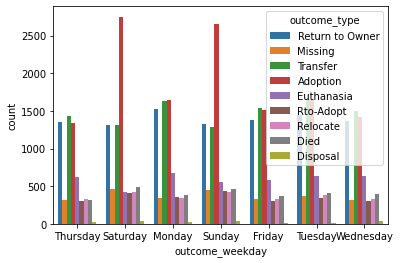

In [ ]:
sns.countplot(x= 'outcome_weekday', hue="outcome_type", data= data)

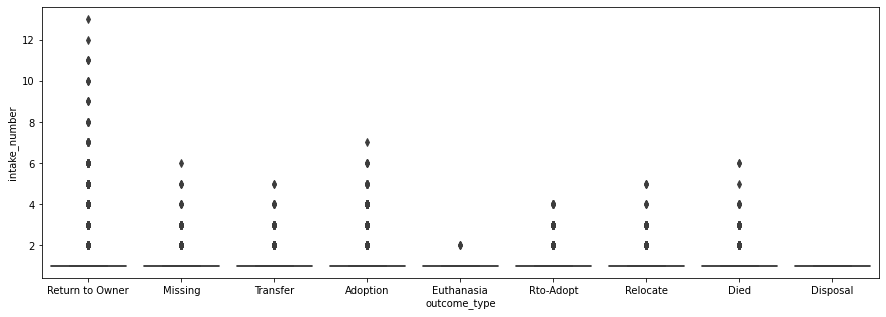

In [ ]:
plt.figure(figsize=(15,5))
sns.boxplot(data['outcome_type'], data['intake_number'])

**FEATURE ENCODING**

In [ ]:
X_check = data.copy()
def onehotdataframe(X_check):    
    one_hot_animal_type=pd.get_dummies(X_check.animal_type)

    one_hot_intake_condition = pd.get_dummies(X_check.intake_condition)
    one_hot_intake_condition.columns = [str(col) + '_intake' for col in one_hot_intake_condition.columns]

    one_hot_intake_type = pd.get_dummies(X_check.intake_type)
    one_hot_intake_type.columns = [str(col) + '_intake' for col in one_hot_intake_type.columns]

    one_hot_sex_upon_intake = pd.get_dummies(X_check.sex_upon_intake)
    one_hot_sex_upon_intake.columns = [str(col) + '_intake' for col in one_hot_sex_upon_intake.columns]

    one_hot_intake_weekday = pd.get_dummies(X_check.intake_weekday)
    one_hot_intake_weekday.columns = [str(col) + '_intake' for col in one_hot_intake_weekday.columns]

    one_hot_sex_upon_outcome = pd.get_dummies(X_check.sex_upon_outcome)
    one_hot_sex_upon_outcome.columns = [str(col) + '_outcome' for col in one_hot_sex_upon_outcome.columns]

    one_hot_outcome_weekday = pd.get_dummies(X_check.outcome_weekday)
    one_hot_outcome_weekday.columns = [str(col) + '_outcome' for col in one_hot_outcome_weekday.columns]     

    X_check = X_check.drop(['animal_type','intake_type', 'intake_condition', 'sex_upon_intake', 'intake_weekday', 'sex_upon_outcome', 'outcome_weekday'], axis = 1) 

    #Merging one hot encoded features with our dataset 'data' 
    X_check=pd.concat([X_check, one_hot_animal_type,one_hot_intake_condition,one_hot_intake_type,one_hot_sex_upon_intake,one_hot_intake_weekday,one_hot_sex_upon_outcome,one_hot_outcome_weekday],axis=1)  
    
    return(X_check)

In [ ]:
X_check_test = test.copy()
def onehotdataframe(X_check_test):    
    one_hot_animal_type=pd.get_dummies(X_check_test.animal_type)

    one_hot_intake_condition = pd.get_dummies(X_check_test.intake_condition)
    one_hot_intake_condition.columns = [str(col) + '_intake' for col in one_hot_intake_condition.columns]

    one_hot_intake_type = pd.get_dummies(X_check_test.intake_type)
    one_hot_intake_type.columns = [str(col) + '_intake' for col in one_hot_intake_type.columns]

    one_hot_sex_upon_intake = pd.get_dummies(X_check_test.sex_upon_intake)
    one_hot_sex_upon_intake.columns = [str(col) + '_intake' for col in one_hot_sex_upon_intake.columns]

    one_hot_intake_weekday = pd.get_dummies(X_check_test.intake_weekday)
    one_hot_intake_weekday.columns = [str(col) + '_intake' for col in one_hot_intake_weekday.columns]

    one_hot_sex_upon_outcome = pd.get_dummies(X_check_test.sex_upon_outcome)
    one_hot_sex_upon_outcome.columns = [str(col) + '_outcome' for col in one_hot_sex_upon_outcome.columns]

    one_hot_outcome_weekday = pd.get_dummies(X_check_test.outcome_weekday)
    one_hot_outcome_weekday.columns = [str(col) + '_outcome' for col in one_hot_outcome_weekday.columns]     

    X_check_test = X_check_test.drop(['animal_type','intake_type', 'intake_condition', 'sex_upon_intake', 'intake_weekday', 'sex_upon_outcome', 'outcome_weekday'], axis = 1) 

    #Merging one hot encoded features with our dataset 'data' 
    X_check_test=pd.concat([X_check_test, one_hot_animal_type,one_hot_intake_condition,one_hot_intake_type,one_hot_sex_upon_intake,one_hot_intake_weekday,one_hot_sex_upon_outcome,one_hot_outcome_weekday],axis=1)  
    
    return(X_check_test)

In [ ]:
X_check = onehotdataframe(X_check)
X_check['outcome_type'] = X_check['outcome_type'].map({'Adoption' : 8, 'Transfer': 7, 'Return to Owner' : 6, 'Euthanasia' : 5, 'Died' : 4, 'Missing' : 3, 'Relocate' : 2, 'Rto-Adopt' : 1, 'Disposal' : 0}) 
y_check = X_check['outcome_type']
X_check= X_check.drop(['outcome_type'], axis = 1)

**LABEL ENCODING**

In [ ]:
from sklearn.preprocessing import LabelEncoder
le1= LabelEncoder()
le2= LabelEncoder()
le1.fit(X_check['breed'])
#print(le1.classes_)
X_check['breed'] = le1.transform(X_check['breed'])
le2.fit(X_check['color'])
#print(le2.classes_)
X_check['color'] = le2.transform(X_check['color'])

In [ ]:
X_check_test = onehotdataframe(X_check_test) 

In [ ]:
from sklearn.preprocessing import LabelEncoder
le1= LabelEncoder()
le2= LabelEncoder()
le1.fit(X_check_test['breed'])
#print(le1.classes_)
X_check_test['breed'] = le1.transform(X_check_test['breed'])
le2.fit(X_check_test['color'])
#print(le2.classes_)
X_check_test['color'] = le2.transform(X_check_test['color'])

In [ ]:
test['ID'] = X_check_test['animal_id_outcome']

**FEATURE SELECTION METHODS**

In [ ]:
#SELECT KBEST METHOD FOR FEATURE SELECTION
from sklearn.feature_selection import chi2, SelectKBest, mutual_info_classif,f_classif, f_regression
#X = data.drop(['outcome_type'],axis=1)
#y = data['outcome_type']
#determine top 20 features 
best = SelectKBest(score_func = f_classif,k=20)
fit = best.fit(X_check,y_check)
score = pd.DataFrame(fit.scores_)
#assign columns 
col = pd.DataFrame(X_check.columns)
#concat dataframes
score = pd.concat([col,score],axis=1)
score.columns = ['Attribute','Score']
#print scores in DESC order
print(score.nlargest(20,'Score'))

                  Attribute        Score
32          Wildlife_intake  3930.451402
19                    Other  3129.920880
37           Unknown_intake  1902.562304
49          Unknown_outcome  1902.562304
18                      Dog  1043.865948
23            Normal_intake   786.176002
17                      Cat   768.531521
3    age_upon_intake_(days)   740.586530
10  age_upon_outcome_(days)   722.040970
30     Public Assist_intake   670.055465
0                  dob_year   659.832989
27              Sick_intake   542.537048
45    Intact Female_outcome   500.814857
48    Spayed Female_outcome   482.045004
47    Neutered Male_outcome   474.751616
35     Neutered Male_intake   437.445867
14             outcome_hour   416.050644
22           Injured_intake   398.715385
46      Intact Male_outcome   397.627414
31             Stray_intake   360.356636


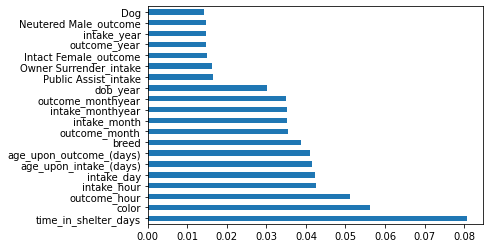

In [ ]:
#ensemble technique for feature selection
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier
model = ExtraTreesClassifier()
model.fit(X_check,y_check)
#print(model.feature_importances_)
imp = pd.Series(model.feature_importances_,index= X_check.columns)
imp.nlargest(20).plot(kind='barh')
plt.show()

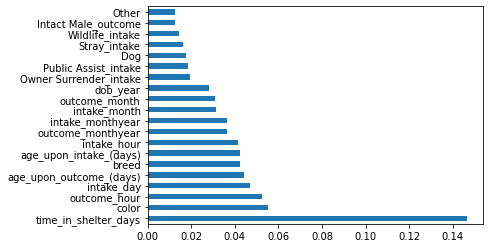

In [ ]:
model = RandomForestClassifier()
model.fit(X_check,y_check)
#print(model.feature_importances_)
imp = pd.Series(model.feature_importances_,index= X_check.columns)
imp.nlargest(20).plot(kind='barh')
plt.show()

In [ ]:
pip install pyswarms

In [ ]:
import pyswarms as ps

In [ ]:
X = X_check
y = y_check

In [ ]:
X = X.values
y = y.values

In [ ]:
classifier1 =  XGBClassifier()
def f_per_particle(m, alpha):
    """Computes for the objective function per particle

    Inputs
    ------
    m : numpy.ndarray
        Binary mask that can be obtained from BinaryPSO, will
        be used to mask features.
    alpha: float (default is 0.5)
        Constant weight for trading-off classifier performance
        and number of features

    Returns
    -------
    numpy.ndarray
        Computed objective function
    """
    total_features = 57
    # Get the subset of the features from the binary mask
    if np.count_nonzero(m) == 0:
        X_subset = X
    else:
        X_subset = X[:,m==1]
    # Perform classification and store performance in P
    classifier1.fit(X_subset, y)
    P = (classifier1.predict(X_subset) == y).mean()
    # Compute for the objective function
    j = (alpha * (1.0 - P)
        + (1.0 - alpha) * (1 - (X_subset.shape[1] / total_features)))
    return j

In [ ]:
#alpha 0.8 
def f(x, alpha=0.88):
    """Higher-level method to do classification in the
    whole swarm.

    Inputs
    ------
    x: numpy.ndarray of shape (n_particles, dimensions)
        The swarm that will perform the search

    Returns
    -------
    numpy.ndarray of shape (n_particles, )
        The computed loss for each particle
    """
    n_particles = x.shape[0]
    j = [f_per_particle(x[i], alpha) for i in range(0,n_particles)]
    return np.array(j)

In [ ]:
# Initialize swarm, arbitrary
options = {'c1': 0.5, 'c2': 0.5, 'w':0.9, 'k': 30, 'p':2}
# Call instance of PSO
dimensions = 57 # dimensions should be the number of features
# Create bounds
optimizer = ps.discrete.BinaryPSO(n_particles=30, dimensions=dimensions, options=options)
# Perform optimization
cost, pos = optimizer.optimize(f, iters=10,verbose = 2)

2021-10-29 08:31:41,255 - pyswarms.discrete.binary - INFO - Optimize for 10 iters with {'c1': 0.5, 'c2': 0.5, 'w': 0.9, 'k': 30, 'p': 2}
pyswarms.discrete.binary: 100%|██████████|10/10, best_cost=0.0427
2021-10-29 09:21:25,084 - pyswarms.discrete.binary - INFO - Optimization finished | best cost: 0.042711214997517226, best pos: [0 1 1 1 1 1 1 0 0 1 1 0 1 0 1 0 1 0 1 1 1 0 1 1 1 0 0 1 1 0 0 1 1 1 1 1 0
 1 1 1 1 0 1 0 1 1 0 1 1 1 1 1 1 1 0 1 1]


In [ ]:
# Create two instances of LGBMClassifier
classifier1 = XGBClassifier()
# Get the selected features from the final positions
X_selected_features = X[:,pos==1]  # subset
# Perform classification and store performance in P
c1 = classifier1.fit(X_selected_features, y)
# Compute performance
subset_performance = (c1.predict(X_selected_features) == y).mean()
print('Subset performance: %.3f' % (subset_performance)) 

Subset performance: 0.992


**XGBOOST MODEL**

In [ ]:
X_check_test = X_check_test.drop(['animal_id_outcome'], axis = 1)

In [ ]:
X_check_test.shape

(31869, 57)

In [ ]:
X = X_check[['breed', 'color', 'age_upon_intake_(days)', 'intake_month',
       'intake_year', 'intake_monthyear',
       'time_in_shelter_days', 'age_upon_outcome_(days)',
       'outcome_year', 'outcome_hour',
       'Bird', 'Dog', 'Other', 'Aged_intake',
       'Injured_intake', 'Normal_intake', 'Nursing_intake',
        'Sick_intake', 'Euthanasia Request_intake',
        'Stray_intake',
       'Wildlife_intake', 'Intact Female_intake', 'Intact Male_intake',
       'Neutered Male_intake', 'Unknown_intake',
       'Friday_intake', 'Monday_intake', 'Saturday_intake',
       'Thursday_intake', 'Wednesday_intake',
       'Intact Female_outcome', 'Neutered Male_outcome',
       'Spayed Female_outcome', 'Unknown_outcome', 'Friday_outcome',
       'Monday_outcome', 'Saturday_outcome', 'Sunday_outcome',
        'Tuesday_outcome', 'Wednesday_outcome']]
#split the dataset into training and testing data
X_train, X_val, y_train, y_val = train_test_split(X_check, y_check, test_size = 0.2, random_state = 30)
#Split is 80%-20% for testing. Here X_test~Validation set.
print(X_train.shape, X_val.shape, y_train.shape, y_val.shape)

(38242, 57) (9561, 57) (38242,) (9561,)


In [ ]:
#XGBOOST CLASSIFIER
import xgboost as xgb
from xgboost import XGBClassifier
xg = XGBClassifier(learning_rate =0.5,n_estimators=1500,max_depth=4,min_child_weight=6,gamma=0.5,subsample=0.8,colsample_bytree=0.8,reg_alpha=0.005,
objective= 'reg:logistic',nthread=4,scale_pos_weight=1,seed=27)
xg.fit(X_check,y)
y_pred=xg.predict(X_val)
print(f1_score(y_pred,y_val,average='micro'))

0.9467628909109925


In [ ]:
#XGBOOST CLASSIFIER
import xgboost as xgb
from xgboost import XGBClassifier
xg = XGBClassifier(learning_rate =0.5,n_estimators=1500,max_depth=4,min_child_weight=6,gamma=0.5,subsample=0.8,colsample_bytree=0.8,reg_alpha=0.005,
objective= 'reg:logistic',nthread=4,scale_pos_weight=1,seed=27)
xg.fit(X_check,y)
pred_df=xg.predict(X_check_test)
print(f1_score(pred_df,y_val,average='micro'))

0.9467628909109925


In [ ]:
pred_df = xg.predict(X_check_test)

**CREATE SUBMISSION FILE**

In [ ]:
predictions = pd.DataFrame(test['ID'])
y_pred_df = pd.DataFrame(pred_df, columns=['outcome_type'])
results = pd.concat([predictions, y_pred_df], axis=1)
results['outcome_type']= results['outcome_type'].map({ 8 :'Adoption', 7: 'Transfer', 6: 'Return to Owner', 5 : 'Euthanasia' , 4 : 'Died' , 3 : 'Missing' , 2 : 'Relocate' ,  1 : 'Rto-Adopt' , 0 : 'Disposal' }).astype(str)

In [ ]:
results

ID     outcome_type
0      A723133         Transfer
1      A723134         Adoption
2      A723135         Adoption
3      A723136         Transfer
4      A723137         Adoption
...        ...              ...
31864  A769060          Missing
31865  A769064       Euthanasia
31866  A769065       Euthanasia
31867  A769066  Return to Owner
31868  A769067  Return to Owner

[31869 rows x 2 columns]

In [ ]:
# Create submission file
results.to_csv("submission1.csv", index=False) 